# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [11]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [4]:
websites = pd.read_csv('/Users/criiiss/ironhack/notebook/labs/lab-supervised-learning-es/website.csv')
df = pd.DataFrame(websites)

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [5]:
# What the dataset looks like?
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [6]:
# What are the data types?
print(df.dtypes)

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


# Which columns contain the features of the websites?
After analysis of the dataset we can define without code with columns are likely to be features of the website: 
URL_LENGTH
NUMBER_SPECIAL_CHARACTERS
CHARSET
SERVER
CONTENT_LENGTH
WHOIS_COUNTRY
WHOIS_STATEPRO
DIST_REMOTE_TCP_PORT
REMOTE_IPS
APP_BYTES
SOURCE_APP_PACKETS
REMOTE_APP_PACKETS
SOURCE_APP_BYTES
REMOTE_APP_BYTES
APP_PACKETS
DNS_QUERY_TIMES


Distribución de la columna 'Type':
Type
0    1565
1     216
Name: count, dtype: int64


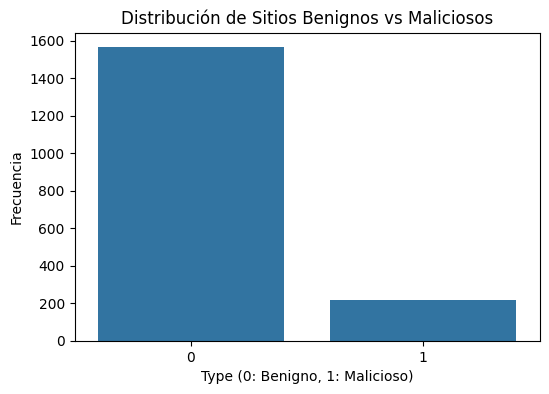

In [12]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
#The column is type, it is which determinates if the website is benign or malicious.
# Inspección de la columna 'Type'
type_counts = df['Type'].value_counts()
print("Distribución de la columna 'Type':")
print(type_counts)

# Visualización de la distribución de la columna 'Type'
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df)
plt.title('Distribución de Sitios Benignos vs Maliciosos')
plt.xlabel('Type (0: Benigno, 1: Malicioso)')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
# 0 for bening 1 for maliciuos websites
benign_code = unique_values[0] if 0 in unique_values else None
malicious_code = unique_values[1] if 1 in unique_values else None

# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
It is not necessary.

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [8]:
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number])

# Crear la matriz de correlaciones
correlation_matrix = numerical_cols.corr()
print(correlation_matrix)


                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104           

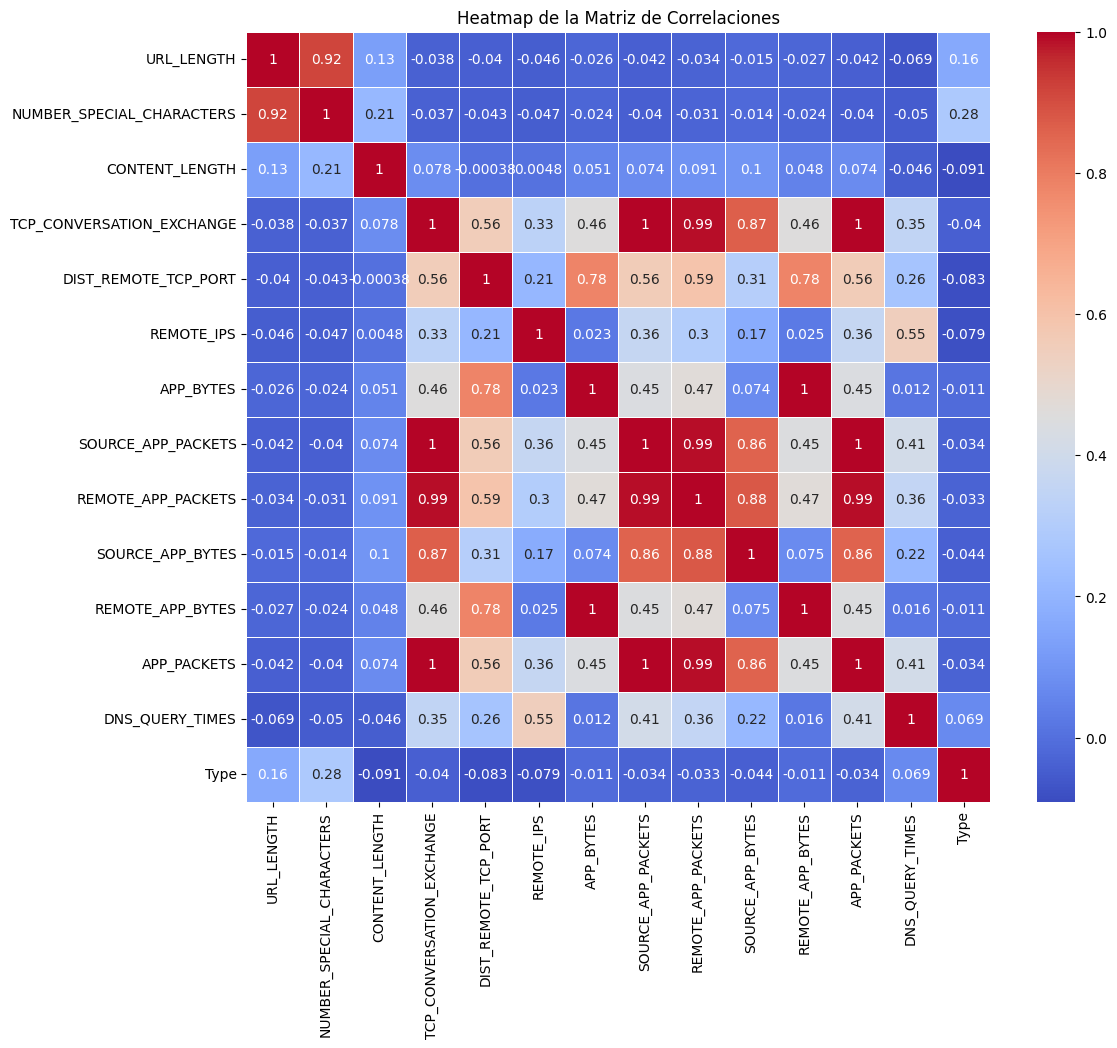

In [13]:
# Crear un mapa de calor para la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlaciones')
plt.show()


## Answer:

Analyzing the heatmap, we can see that there are some columns which are highly correlated:

· TCP_conversation_exchange - remote_app_packages
· Remote_app_packages - source_app_packages
· Remote_app_bytes - TCP_conversation_exchange
· URL_length - number_special_characters


It is recommended to eliminate these columns due to their high correlation level, which causes multicollinearity.


### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [14]:
import os 
! pip3 install xgboost

  Using cached xgboost-2.1.0-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.1 MB)

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [ ]:
sort_idx = xgb.feature_importances_.argsort()

In [ ]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

Pares de columnas con alta correlación:
APP_BYTES                  REMOTE_APP_BYTES             0.999992
REMOTE_APP_BYTES           APP_BYTES                    0.999992
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  APP_PACKETS                  0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
REMOTE_APP_PACKETS         APP_PACKETS                  0.989285
                           SOURCE_APP_PACKETS           0.989285
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
dtype: float64


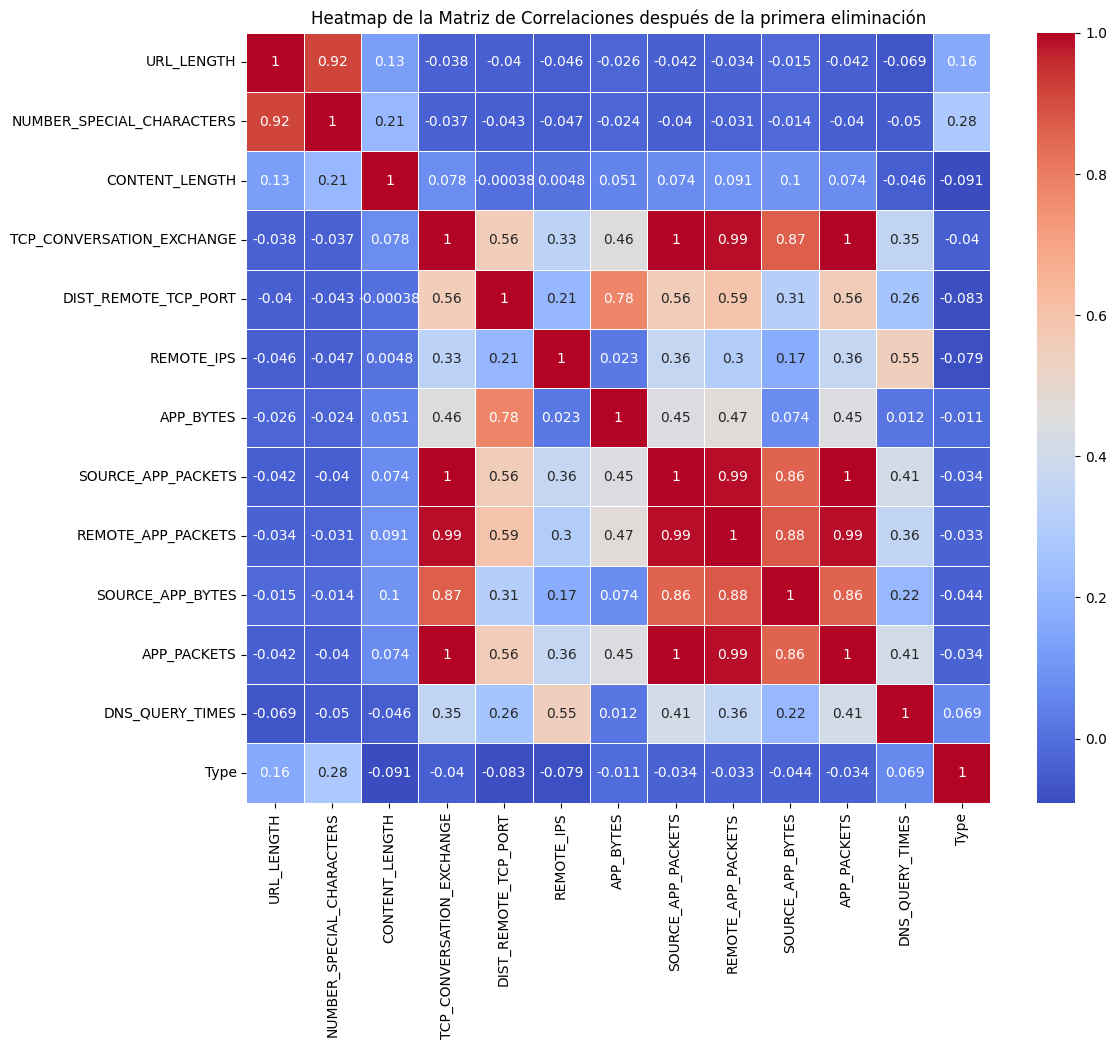

In [17]:
# Crear una copia del DataFrame original para iteraciones
df_iter = df.copy()

# Identificar las columnas altamente correlacionadas (correlación > 0.9)
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Eliminar la correlación de una variable consigo misma
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9]

# Mostrar pares de columnas con alta correlación
print("Pares de columnas con alta correlación:")
print(high_corr_pairs)

# Eliminar la primera columna de cada par con alta correlación (por ejemplo, 'REMOTE_APP_BYTES')
df_iter.drop(columns=['REMOTE_APP_BYTES'], inplace=True)

# Crear la nueva matriz de correlaciones
correlation_matrix_iter = df_iter.select_dtypes(include=[np.number]).corr()

# Crear un nuevo mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_iter, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlaciones después de la primera eliminación')
plt.show()


Pares de columnas con alta correlación después de la primera eliminación:
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  APP_PACKETS                  0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
REMOTE_APP_PACKETS         APP_PACKETS                  0.989285
                           SOURCE_APP_PACKETS           0.989285
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64


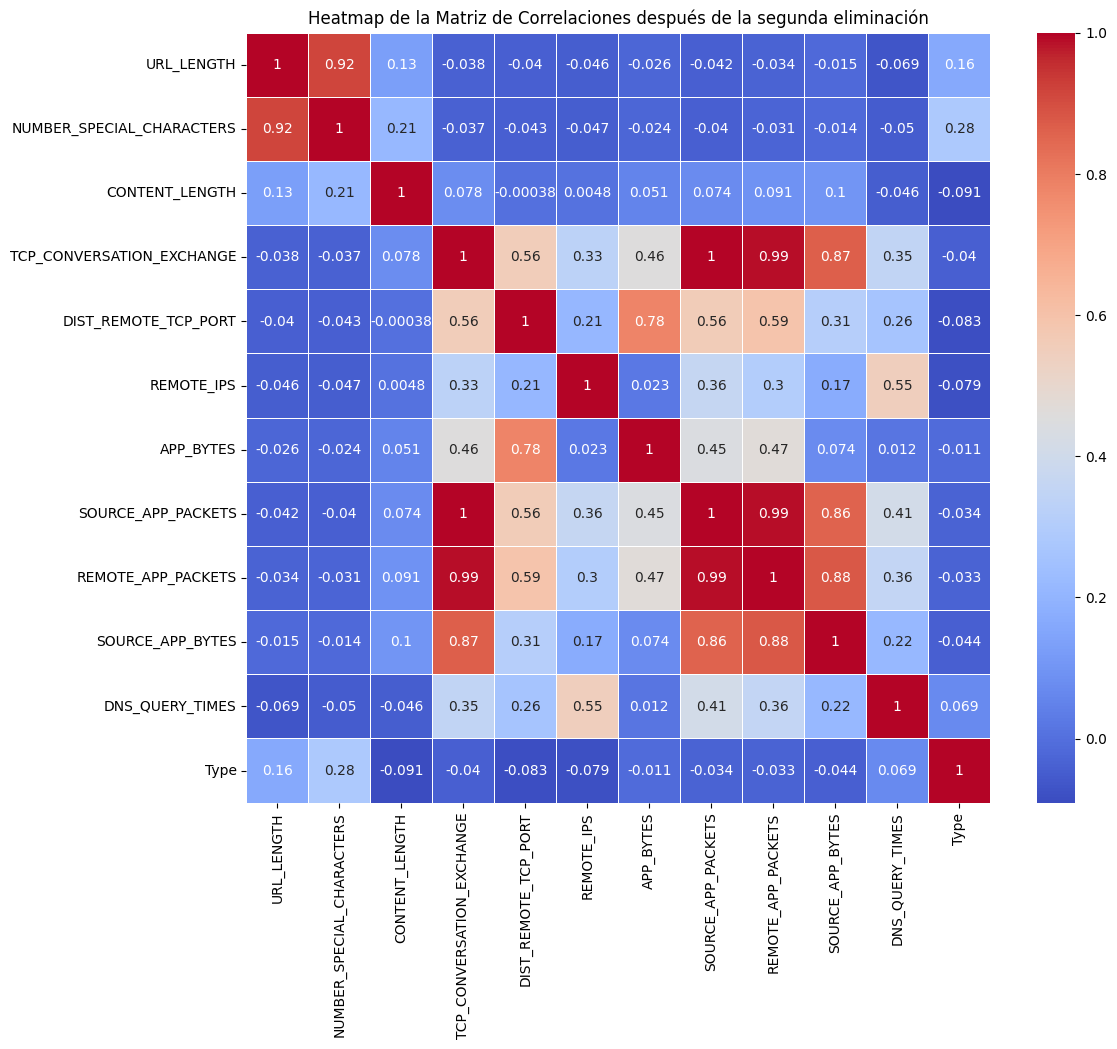

In [18]:
# Identificar las columnas altamente correlacionadas (correlación > 0.9)
high_corr_pairs_iter = correlation_matrix_iter.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs_iter = high_corr_pairs_iter[high_corr_pairs_iter != 1]  # Eliminar la correlación de una variable consigo misma
high_corr_pairs_iter = high_corr_pairs_iter[high_corr_pairs_iter > 0.9]

# Mostrar pares de columnas con alta correlación
print("Pares de columnas con alta correlación después de la primera eliminación:")
print(high_corr_pairs_iter)

# Eliminar la siguiente columna de cada par con alta correlación (por ejemplo, 'APP_PACKETS')
df_iter.drop(columns=['APP_PACKETS'], inplace=True)

# Crear la nueva matriz de correlaciones
correlation_matrix_iter = df_iter.select_dtypes(include=[np.number]).corr()

# Crear un nuevo mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_iter, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlaciones después de la segunda eliminación')
plt.show()


# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [19]:
# Examinar el número de valores faltantes en cada columna
missing_values = df.isnull().sum()

print("Número de valores faltantes en cada columna:")
print(missing_values)

Número de valores faltantes en cada columna:
URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [20]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percentage = (missing_values / len(df)) * 100

# Identificar las columnas con más del 50% de valores faltantes
columns_to_drop_due_to_missing_data = missing_percentage[missing_percentage > 50].index

# Eliminar las columnas con más del 50% de valores faltantes
df.drop(columns=columns_to_drop_due_to_missing_data, inplace=True)


In [21]:
# Now we will drop the rows with missing data
df.dropna(inplace=True)

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [22]:
# Examine missing values in each column
# Examinar el número de valores faltantes en cada columna
missing_values = df.isnull().sum()

print("Número de valores faltantes en cada columna:")
print(missing_values)

Número de valores faltantes en cada columna:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [23]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [ ]:

good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])




In [ ]:
websites.WHOIS_COUNTRY.unique()

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

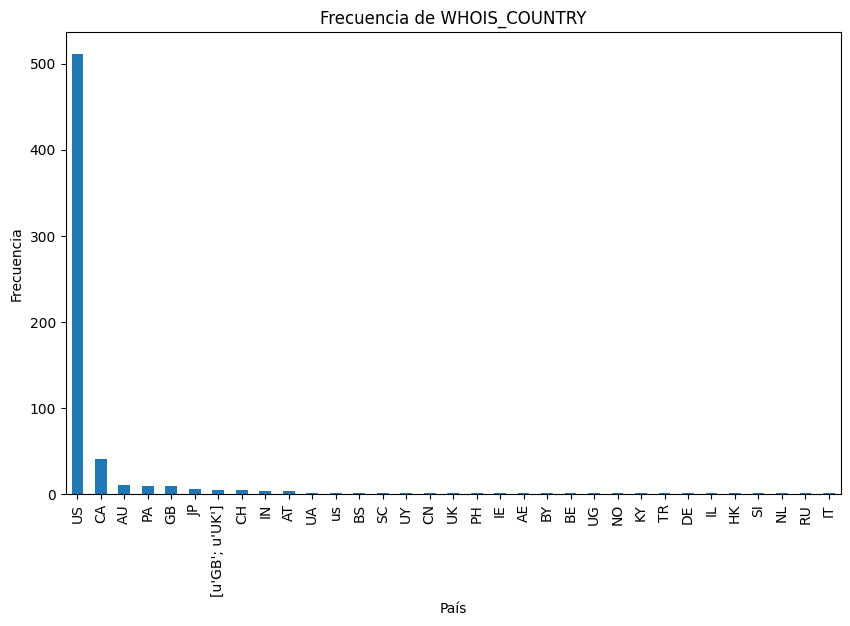

In [26]:
# Imprimir el gráfico de barras de los value_counts de la columna WHOIS_COUNTRY
plt.figure(figsize=(10, 6))
df['WHOIS_COUNTRY'].value_counts(dropna=False).plot(kind='bar')
plt.title('Frecuencia de WHOIS_COUNTRY')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [27]:
# Verificar la distribución de los valores en la columna WHOIS_COUNTRY
print(df['WHOIS_COUNTRY'].value_counts(dropna=False))

# Identificar los 10 valores más frecuentes
top_10_countries = df['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Reemplazar los valores que no están en los 10 más frecuentes por 'OTHER'
df['WHOIS_COUNTRY'] = df['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

# Imprimir la nueva distribución de los valores en la columna WHOIS_COUNTRY
print(df['WHOIS_COUNTRY'].value_counts())

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64
WHOIS_COUNTRY
US                511
CA                 41
OTHER              29
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [28]:
# Eliminar las columnas 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
df.drop(columns=columns_to_drop, inplace=True)

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [31]:
print("Tipos de datos de las columnas:")
print(df.dtypes)

Tipos de datos de las columnas:
URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [32]:
# Eliminar la columna 'URL' del DataFrame
df.drop(columns=['URL'], inplace=True)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [33]:
# Imprimir el recuento de valores únicos en la columna 'CHARSET'
unique_charsets = df['CHARSET'].value_counts()
print("Recuento de valores únicos en 'CHARSET':")
print(unique_charsets)

Recuento de valores únicos en 'CHARSET':
CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [34]:
# Imprimir los valores únicos en la columna 'SERVER'
unique_servers = df['SERVER'].unique()
print("Valores únicos en 'SERVER':")
print(unique_servers)

Valores únicos en 'SERVER':
['nginx' 'Apache/2' 'Microsoft-HTTPAPI/2.0' 'Apache/2.4.7 (Ubuntu)'
 'Apache' 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22' 'Microsoft-IIS/7.5' 'nginx/1.12.0'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22 (Debian)' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Apache/2.4.25'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.6 (CentOS) PHP/5.6.8' 'AmazonS3' 'ATS' 'CherryPy/3.6.0'
 'Apache/2.2.15 (CentOS)' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40'
 'Apache/2.2.3 (CentOS)' 'Apache/2.4' 'Apache/2.4.10 (Debian)'
 'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'mw2232.codfw.wmnet' 'Sucuri/Cloudproxy' 'cloudflare-nginx'
 'Apache/2.0.52 (Re

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [37]:
# Definir un mapeo para categorizar los servidores
def categorize_server(server):
    if 'Microsoft' in server:
        return 'Microsoft'
    elif 'Apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [38]:
import pandas as pd

# Supongamos que ya tienes el DataFrame `df` después de todas las transformaciones anteriores
# Crear variables dummy para las columnas categóricas
website_dummy = pd.get_dummies(df, drop_first=True)

# Mostrar las primeras filas del DataFrame resultante
print("Primeras filas del DataFrame con variables dummy:")
print(website_dummy.head())

# Mostrar las columnas del DataFrame resultante
print("\nColumnas del DataFrame con variables dummy:")
print(website_dummy.columns)


Primeras filas del DataFrame con variables dummy:
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
3           17                          6           162.0   
6           18                          6           345.0   
7           19                          6           324.0   
11          20                          6           324.0   
16          21                          7           686.0   

    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
3                          31                    22           3       3812   
6                          12                     0           3       1189   
7                           0                     0           0          0   
11                          0                     0           0          0   
16                          6                     0           2        603   

    SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
3                   39                  37   

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [39]:
import pandas as pd

# Supongamos que ya tienes el DataFrame `website_dummy` después de aplicar get_dummies

# Verificar los tipos de datos de todas las columnas en website_dummy
print("Tipos de datos en 'website_dummy':")
print(website_dummy.dtypes)

# Mostrar las primeras filas del DataFrame para inspeccionar los datos
print("\nPrimeras filas de 'website_dummy':")
print(website_dummy.head())

# Mostrar las columnas del DataFrame para verificar que no hay columnas categóricas
print("\nColumnas en 'website_dummy':")
print(website_dummy.columns)


Tipos de datos en 'website_dummy':
URL_LENGTH                        int64
NUMBER_SPECIAL_CHARACTERS         int64
CONTENT_LENGTH                  float64
TCP_CONVERSATION_EXCHANGE         int64
DIST_REMOTE_TCP_PORT              int64
                                 ...   
WHOIS_COUNTRY_JP                   bool
WHOIS_COUNTRY_OTHER                bool
WHOIS_COUNTRY_PA                   bool
WHOIS_COUNTRY_US                   bool
WHOIS_COUNTRY_[u'GB'; u'UK']       bool
Length: 148, dtype: object

Primeras filas de 'website_dummy':
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
3           17                          6           162.0   
6           18                          6           345.0   
7           19                          6           324.0   
11          20                          6           324.0   
16          21                          7           686.0   

    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
3                

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Supongamos que 'website_dummy' es el DataFrame con las variables dummy
# y 'Type' es la columna objetivo que queremos predecir

# Separar las características (X) y el objetivo (y)
X = website_dummy.drop(columns=['Type'])  # Características
y = website_dummy['Type']  # Objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, 
    test_size=0.20,  # 20% para prueba
    random_state=42  # Para reproducibilidad
)

# Verificar las dimensiones de los conjuntos resultantes
print("Dimensiones de los conjuntos de datos:")
print("X_entrenamiento:", X_entrenamiento.shape)
print("X_prueba:", X_prueba.shape)
print("y_entrenamiento:", y_entrenamiento.shape)
print("y_prueba:", y_prueba.shape)


Dimensiones de los conjuntos de datos:
X_entrenamiento: (508, 147)
X_prueba: (128, 147)
y_entrenamiento: (508,)
y_prueba: (128,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [41]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# Mostrar un mensaje para confirmar que el modelo ha sido inicializado
print("Modelo de regresión logística inicializado.")


Modelo de regresión logística inicializado.


A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
modelo_logistico.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_prueba)

# Evaluar el modelo
# Calcular precisión
precision = accuracy_score(y_prueba, predicciones)
print("Precisión del modelo:", precision)

# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_prueba, predicciones))

# Imprimir la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_prueba, predicciones))



Precisión del modelo: 0.9296875

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       117
           1       0.62      0.45      0.53        11

    accuracy                           0.93       128
   macro avg       0.79      0.71      0.74       128
weighted avg       0.92      0.93      0.92       128


Matriz de confusión:
[[114   3]
 [  6   5]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
modelo_logistico.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_prueba)

# Calcular la precisión
precision = accuracy_score(y_prueba, y_pred)
print("Precisión del modelo:", precision)

# Imprimir la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_prueba, y_pred))


Precisión del modelo: 0.9296875

Matriz de confusión:
[[114   3]
 [  6   5]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.
La precisión es alta y la matriz de confusión muestra pocos falsos positivos y falsos negativos, entonces el modelo está funcionando bien y haciendo predicciones correctas la mayor parte del tiempo.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [46]:
# Importar las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Inicializar el modelo de árbol de decisión con max_depth=3
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_prueba)

# Calcular la precisión
precision_arbol = accuracy_score(y_prueba, y_pred_arbol)
print("Precisión del modelo de árbol de decisión:", precision_arbol)

# Imprimir la matriz de confusión
print("\nMatriz de confusión del modelo de árbol de decisión:")
print(confusion_matrix(y_prueba, y_pred_arbol))


Precisión del modelo de árbol de decisión: 0.9375

Matriz de confusión del modelo de árbol de decisión:
[[117   0]
 [  8   3]]


Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [48]:
# Calcular las probabilidades predichas para el conjunto de prueba
probabilidades = modelo_arbol.predict_proba(X_prueba)

# Convertir las probabilidades en predicciones binarias usando un umbral de 0.5
# En `predict_proba`, la columna 1 corresponde a la probabilidad de la clase positiva (1)
predicciones_binarias = (probabilidades[:, 1] >= 0.5).astype(int)

# Calcular la precisión
precision_arbol = accuracy_score(y_prueba, predicciones_binarias)
print("Precisión del modelo de árbol de decisión:", precision_arbol)

# Imprimir la matriz de confusión
print("\nMatriz de confusión del modelo de árbol de decisión:")
print(confusion_matrix(y_prueba, predicciones_binarias))


Precisión del modelo de árbol de decisión: 0.9375

Matriz de confusión del modelo de árbol de decisión:
[[117   0]
 [  8   3]]


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Inicializar el nuevo modelo de árbol de decisión con max_depth=5
modelo_arbol_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar el nuevo modelo con los datos de entrenamiento
modelo_arbol_5.fit(X_entrenamiento, y_entrenamiento)

# Calcular las probabilidades predichas para el conjunto de prueba
probabilidades_5 = modelo_arbol_5.predict_proba(X_prueba)

# Convertir las probabilidades en predicciones binarias usando un umbral de 0.5
predicciones_binarias_5 = (probabilidades_5[:, 1] >= 0.5).astype(int)

# Calcular la precisión
precision_arbol_5 = accuracy_score(y_prueba, predicciones_binarias_5)
print("Precisión del modelo de árbol de decisión (max_depth=5):", precision_arbol_5)

# Imprimir la matriz de confusión
print("\nMatriz de confusión del modelo de árbol de decisión (max_depth=5):")
print(confusion_matrix(y_prueba, predicciones_binarias_5))


Precisión del modelo de árbol de decisión (max_depth=5): 0.890625

Matriz de confusión del modelo de árbol de decisión (max_depth=5):
[[111   6]
 [  8   3]]


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión: No se puede observar que al limitar la profundidad a 5 esto crea que la matriz de confusión muestra mas falsos no y que la precisión del model ha bajado. Esto es porque bajas la capacidad de aprendizaje limitando el profundidad del arbol de decisión.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: